In [28]:
import pandas as pd
import json
import numpy as np

Important note :- I have kept some sample json files as all files are in GB's and can't be sent via Email. Please add all the Json files and then run this notebook.

In [29]:
base_dir = r'C:\Users\yoges\Downloads\Interview Test Assignment_Yogesh Kumar Singla'

In [30]:
import os
file_names = list()
for root, dirs, files in os.walk(base_dir+'\json'):
    for filename in files:
#         print(filename)
        file_names.append(filename)
print(len(file_names))

12773


In [31]:
def open_file(file_name):
    with open('.\json\\'+file_name) as data_file:
       data_string = data_file.read()
       try:
           data = json.loads(data_string)
#            print('Success!')
       except ValueError:
           print('Failed:')
#        print(data)
       return data

In [32]:
# data = open_file('72572.json')
# data['HotelInfo'].keys()

Here as some rating are missing in many reviews. So, we can't take average by dividing with number of reviews. So, I have taken average by counting total number of occurences for each review and that value is used in denominator for taking average.

In [6]:
def hotel_ratings_average(data): 
    ratings_count = dict()
    ratings_total = {'Service': 0, 'Cleanliness': 0, 'Overall': 0, 'Value': 0, 'Sleep Quality': 0, 'Rooms': 0, 'Location': 0, 'Business service':0, 'Business service (e.g., internet access)': 0, 'Check in / front desk': 0}
    new_keys = list()
    for reviews in data['Reviews']:
        for rating in reviews['Ratings']:
            if rating in ratings_count.keys():
                ratings_count[rating] += 1
            else:
                ratings_count[rating] = 1
            try:
                ratings_total[rating] += float(reviews['Ratings'][rating])
            except:
                ratings_total[rating] = 0
                ratings_total[rating] += float(reviews['Ratings'][rating])
                new_keys.append(rating)
    if new_keys != []:
        print("new_keys",new_keys)
    average_ratings = dict()
    for rating in ratings_count.keys():
        try:
            average_ratings[rating] = ratings_total[rating]/ratings_count[rating]
        except:
            average_ratings[rating] = np.nan
#     print(average_ratings)
    return average_ratings

In [7]:
df = pd.DataFrame(columns = ['Service', 'Cleanliness', 'Overall', 'Value', 'Sleep Quality', 'Rooms', 'Location','Business service', 'Business service (e.g., internet access)', 'Check in / front desk', 'Name', 'HotelURL', 'Price', 'Address', 'HotelID', 'ImgURL'])
dict_list = list()
iteration = 0
for hotel in file_names:
    data = open_file(hotel)
    row_dict = hotel_ratings_average(data)
    row_dict.update(data['HotelInfo'])
    dict_list.append(row_dict)
    if iteration%10 == 0:
        print(hotel, iteration) # For progress purpose
    iteration += 1
#     print(row_dict.keys())
df = df.append(dict_list, ignore_index=True)
print(df.head())

100407.json 0
100531.json 10
100560.json 20
100574.json 30
100600.json 40
1006218.json 50
1007816.json 60
1009147.json 70
1012556.json 80
1013704.json 90
1015196.json 100
1017574.json 110
1020431.json 120
1022712.json 130
1024563.json 140
1025762.json 150
1027050.json 160
1028066.json 170
1036724.json 180
1048931.json 190
105160.json 200
1052697.json 210
1055920.json 220
1057646.json 230
1060784.json 240
1064610.json 250
1069926.json 260
1073880.json 270
1079204.json 280
1082828.json 290
1082914.json 300
1083452.json 310
1083522.json 320
1085781.json 330
1088459.json 340
1089708.json 350
1090599.json 360
1091707.json 370
109335.json 380
109370.json 390
109413.json 400
109468.json 410
1097114.json 420
1101231.json 430
1103924.json 440
1105473.json 450
1109968.json 460
111417.json 470
1114492.json 480
111509.json 490
1115809.json 500
111699.json 510
111829.json 520
111934.json 530
111978.json 540
112041.json 550
112178.json 560
112281.json 570
112328.json 580
112434.json 590
1129022.json

2416579.json 4820
242226.json 4830
242998.json 4840
243471.json 4850
243709.json 4860
2452525.json 4870
247814.json 4880
248162.json 4890
248801.json 4900
248853.json 4910
249007.json 4920
249509.json 4930
249712.json 4940
2503269.json 4950
250499.json 4960
250933.json 4970
2514174.json 4980
2514184.json 4990
2514194.json 5000
2514204.json 5010
2514214.json 5020
2514224.json 5030
2514234.json 5040
2514244.json 5050
2514254.json 5060
2514264.json 5070
2514274.json 5080
2514284.json 5090
2514294.json 5100
2514304.json 5110
2514314.json 5120
2514324.json 5130
2514334.json 5140
2514344.json 5150
2514354.json 5160
2514364.json 5170
2514374.json 5180
2514384.json 5190
2514394.json 5200
2514404.json 5210
2514414.json 5220
2514424.json 5230
2514434.json 5240
2514444.json 5250
2514454.json 5260
2514464.json 5270
2514474.json 5280
2514484.json 5290
2514494.json 5300
2514504.json 5310
2514514.json 5320
2514524.json 5330
2514534.json 5340
2514544.json 5350
2514554.json 5360
2514564.json 5370
25145

543256.json 9520
543518.json 9530
545823.json 9540
549249.json 9550
549494.json 9560
550224.json 9570
552711.json 9580
554731.json 9590
555736.json 9600
556970.json 9610
557499.json 9620
557553.json 9630
557999.json 9640
559387.json 9650
559726.json 9660
562390.json 9670
563485.json 9680
564182.json 9690
564820.json 9700
565626.json 9710
566439.json 9720
567314.json 9730
567441.json 9740
567574.json 9750
567739.json 9760
568184.json 9770
568910.json 9780
569842.json 9790
570314.json 9800
570467.json 9810
570855.json 9820
571104.json 9830
571448.json 9840
572187.json 9850
573252.json 9860
574287.json 9870
574787.json 9880
575483.json 9890
575949.json 9900
576871.json 9910
577480.json 9920
577896.json 9930
578345.json 9940
578898.json 9950
579426.json 9960
580543.json 9970
581725.json 9980
582045.json 9990
582392.json 10000
582732.json 10010
583286.json 10020
583797.json 10030
584407.json 10040
584668.json 10050
585124.json 10060
585224.json 10070
585853.json 10080
586933.json 10090
5876

In [8]:
df_new = df.copy()
df_new['Business service_new'] = df_new.pop("Business service").fillna(df_new.pop("Business service (e.g., internet access)"))
df_new.to_csv("hotels_rating.csv",index=False)

In [9]:
print(df_new['Business service_new'][:5])
df_new.to_csv("hotels_rating_nan.csv",index=False)

0    4.428571
1    4.196078
2    3.088889
3    1.000000
4    4.342857
Name: Business service_new, dtype: float64


In [10]:
print(df_new.columns)

Index(['Service', 'Cleanliness', 'Overall', 'Value', 'Sleep Quality', 'Rooms',
       'Location', 'Check in / front desk', 'Name', 'HotelURL', 'Price',
       'Address', 'HotelID', 'ImgURL', 'Business service_new'],
      dtype='object')


In [11]:
df_new.describe()

,Service,Cleanliness,Overall,Value,Sleep Quality,Rooms,Location,Check in / front desk,Business service_new
count,12742.000000,12743.000000,12746.000000,12743.000000,9855.000000,12740.000000,12723.000000,10765.000000,10429.000000
mean,3.564157,3.722649,3.629737,3.450918,3.775413,3.428708,3.643210,3.243531,2.648103
std,0.988583,1.060135,0.814138,1.042824,0.755505,0.985663,1.332683,1.382147,1.561525
min,-1.000000,-1.000000,0.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.090909,3.265306,3.183553,3.015355,3.400000,2.936709,3.275658,2.666667,1.736842
50%,3.792226,4.009174,3.800000,3.746032,3.969072,3.639417,4.092593,3.652174,3.000000
75%,4.250000,4.475617,4.222222,4.145853,4.320131,4.126707,4.550953,4.222222,3.833333
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12773 entries, 0 to 12772
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Service                12742 non-null  float64
 1   Cleanliness            12743 non-null  float64
 2   Overall                12746 non-null  float64
 3   Value                  12743 non-null  float64
 4   Sleep Quality          9855 non-null   float64
 5   Rooms                  12740 non-null  float64
 6   Location               12723 non-null  float64
 7   Check in / front desk  10765 non-null  float64
 8   Name                   10008 non-null  object 
 9   HotelURL               12742 non-null  object 
 10  Price                  12773 non-null  object 
 11  Address                10008 non-null  object 
 12  HotelID                12773 non-null  object 
 13  ImgURL                 10008 non-null  object 
 14  Business service_new   10429 non-null  float64
dtypes:

In [13]:
min_price = list()
max_price = list()
exceptions_list = list()
for ind, i in enumerate(df_new['Price']):
    i = i.replace('*',"").replace("$","")
    i = i.replace('and',"").replace("up","").replace("down","").replace(",","")
    temp = i.split("-")
#     print(temp)
    if len(temp)==1:
        temp.append(temp[0])
    if len(temp)>=2:
        try:
            min_price.append(int(temp[0]))
            max_price.append(int(temp[1]))
        except:
            min_price.append(np.nan)
            max_price.append(np.nan)
            exceptions_list.append(temp)
    if ind%10 == 0:
        print(ind)
print(exceptions_list)
df_new['min_price'] = min_price
df_new['max_price'] = max_price
print(exceptions_list)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [14]:
df_new

,Service,Cleanliness,Overall,Value,Sleep Quality,Rooms,Location,Check in / front desk,Name,HotelURL,Price,Address,HotelID,ImgURL,Business service_new,min_price,max_price
0,4.588235,4.742857,4.444444,4.200000,4.388889,4.600000,4.500000,4.000000,Hilton Garden Inn Baltimore White Marsh,/ShowUserReviews-g60811-d100407-Reviews-Hilton...,$135 - $193*,"<address><span rel=""v:address""><span dir=""ltr""...",100407,http://media-cdn.tripadvisor.com/media/Provide...,4.428571,135.0,193.0
1,4.564557,4.679293,4.481043,4.272727,4.532567,4.435530,4.695522,4.375000,Hotel Monaco Seattle - a Kimpton Hotel,/ShowUserReviews-g60878-d100504-Reviews-Hotel_...,$184 - $345*,"<address class=""addressReset""> <span rel=""v:ad...",100504,http://media-cdn.tripadvisor.com/media/photo-s...,4.196078,184.0,345.0
2,3.776062,3.888462,3.567114,3.650000,3.807407,3.648069,4.409910,3.439394,Warwick Seattle Hotel,/ShowUserReviews-g60878-d100505-Reviews-Warwic...,$129 - $228*,"<address class=""addressReset""> <span rel=""v:ad...",100505,http://media-cdn.tripadvisor.com/media/photo-s...,3.088889,129.0,228.0
3,2.300000,2.000000,1.666667,2.000000,2.176471,1.545455,4.000000,3.000000,Hotel Seattle,/ShowUserReviews-g60878-d100506-Reviews-Hotel_...,$96 - $118*,"<address class=""addressReset""> <span rel=""v:ad...",100506,http://media-cdn.tripadvisor.com/media/Provide...,1.000000,96.0,118.0
4,4.749491,4.828921,4.715370,4.344196,4.684524,4.658080,4.949761,4.589041,Inn at the Market,/ShowUserReviews-g60878-d100507-Reviews-Inn_at...,$199 - $299*,"<address class=""addressReset""> <span rel=""v:ad...",100507,http://media-cdn.tripadvisor.com/media/photo-s...,4.342857,199.0,299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12768,3.552941,3.354651,3.100529,3.494253,3.467391,2.679245,4.493506,3.333333,Comfort Inn Central Park West,/ShowUserReviews-g60763-d99447-Reviews-Comfort...,$153 - $310*,"<address class=""addressReset""> <span rel=""v:ad...",99447,http://media-cdn.tripadvisor.com/media/Provide...,3.090909,153.0,310.0
12769,2.886667,3.286667,4.093333,2.326667,NaN,3.280000,2.120000,2.200000,NaN,NaN,$457,NaN,99466,NaN,0.766667,457.0,457.0
12770,3.031690,3.242958,4.531690,2.690141,NaN,3.116197,2.179577,2.130282,NaN,NaN,$370,NaN,99762,NaN,1.475352,370.0,370.0
12771,3.412214,3.617770,3.512248,3.545918,3.605119,3.230281,4.594100,3.645695,The Roosevelt Hotel,/ShowUserReviews-g60763-d99766-Reviews-The_Roo...,$243 - $440*,"<address class=""addressReset""> <span rel=""v:ad...",99766,http://media-cdn.tripadvisor.com/media/Provide...,3.157895,243.0,440.0


In [15]:
df_new['Service'].fillna(df_new['Service'].mean(),inplace=True)
df_new['Cleanliness'].fillna(df_new['Cleanliness'].mean(),inplace=True)
df_new['Overall'].fillna(df_new['Overall'].mean(),inplace=True)
df_new['Value'].fillna(df_new['Value'].mean(),inplace=True)
df_new['Sleep Quality'].fillna(df_new['Sleep Quality'].mean(),inplace=True)
df_new['Rooms'].fillna(df_new['Rooms'].mean(),inplace=True)
df_new['Location'].fillna(df_new['Location'].mean(),inplace=True)
df_new['Check in / front desk'].fillna(df_new['Check in / front desk'].mean(),inplace=True)
df_new['Business service_new'].fillna(df_new['Business service_new'].mean(),inplace=True)
df_new['min_price'].fillna(df_new['min_price'].mean(),inplace=True)
df_new['max_price'].fillna(df_new['max_price'].mean(),inplace=True)

### Removing -ve values and values greater then 5
#### Here first I thought of replacing value less then 0 with 0 as rating is probably in range of 0 and 5. But it is going to make inconsitensity without knowing frontend.

In [16]:
# df_new['Service'][df_new['Service']<0] = 0
# df_new['Cleanliness'][df_new['Cleanliness']<0] = 0
# df_new['Overall'][df_new['Overall']<0] = 0
# df_new['Value'][df_new['Value']<0] = 0
# df_new['Sleep Quality'][df_new['Sleep Quality']<0] = 0
# df_new['Rooms'][df_new['Rooms']<0] = 0
# df_new['Location'][df_new['Location']<0] = 0
# df_new['Check in / front desk'][df_new['Check in / front desk']<0] = 0
# df_new['Business service_new'][df_new['Business service_new']<0] = 0

In [17]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12773 entries, 0 to 12772
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Service                12773 non-null  float64
 1   Cleanliness            12773 non-null  float64
 2   Overall                12773 non-null  float64
 3   Value                  12773 non-null  float64
 4   Sleep Quality          12773 non-null  float64
 5   Rooms                  12773 non-null  float64
 6   Location               12773 non-null  float64
 7   Check in / front desk  12773 non-null  float64
 8   Name                   10008 non-null  object 
 9   HotelURL               12742 non-null  object 
 10  Price                  12773 non-null  object 
 11  Address                10008 non-null  object 
 12  HotelID                12773 non-null  object 
 13  ImgURL                 10008 non-null  object 
 14  Business service_new   12773 non-null  float64
 15  mi

In [18]:
df_new.to_csv("hotels_rating.csv",index=False)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Covariance Plot')

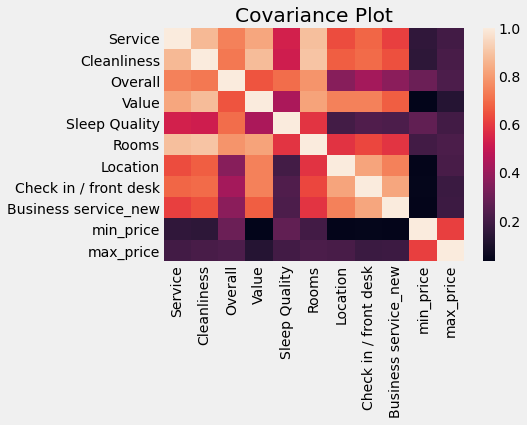

In [20]:
sns.heatmap(df_new.corr())
plt.title('Covariance Plot')

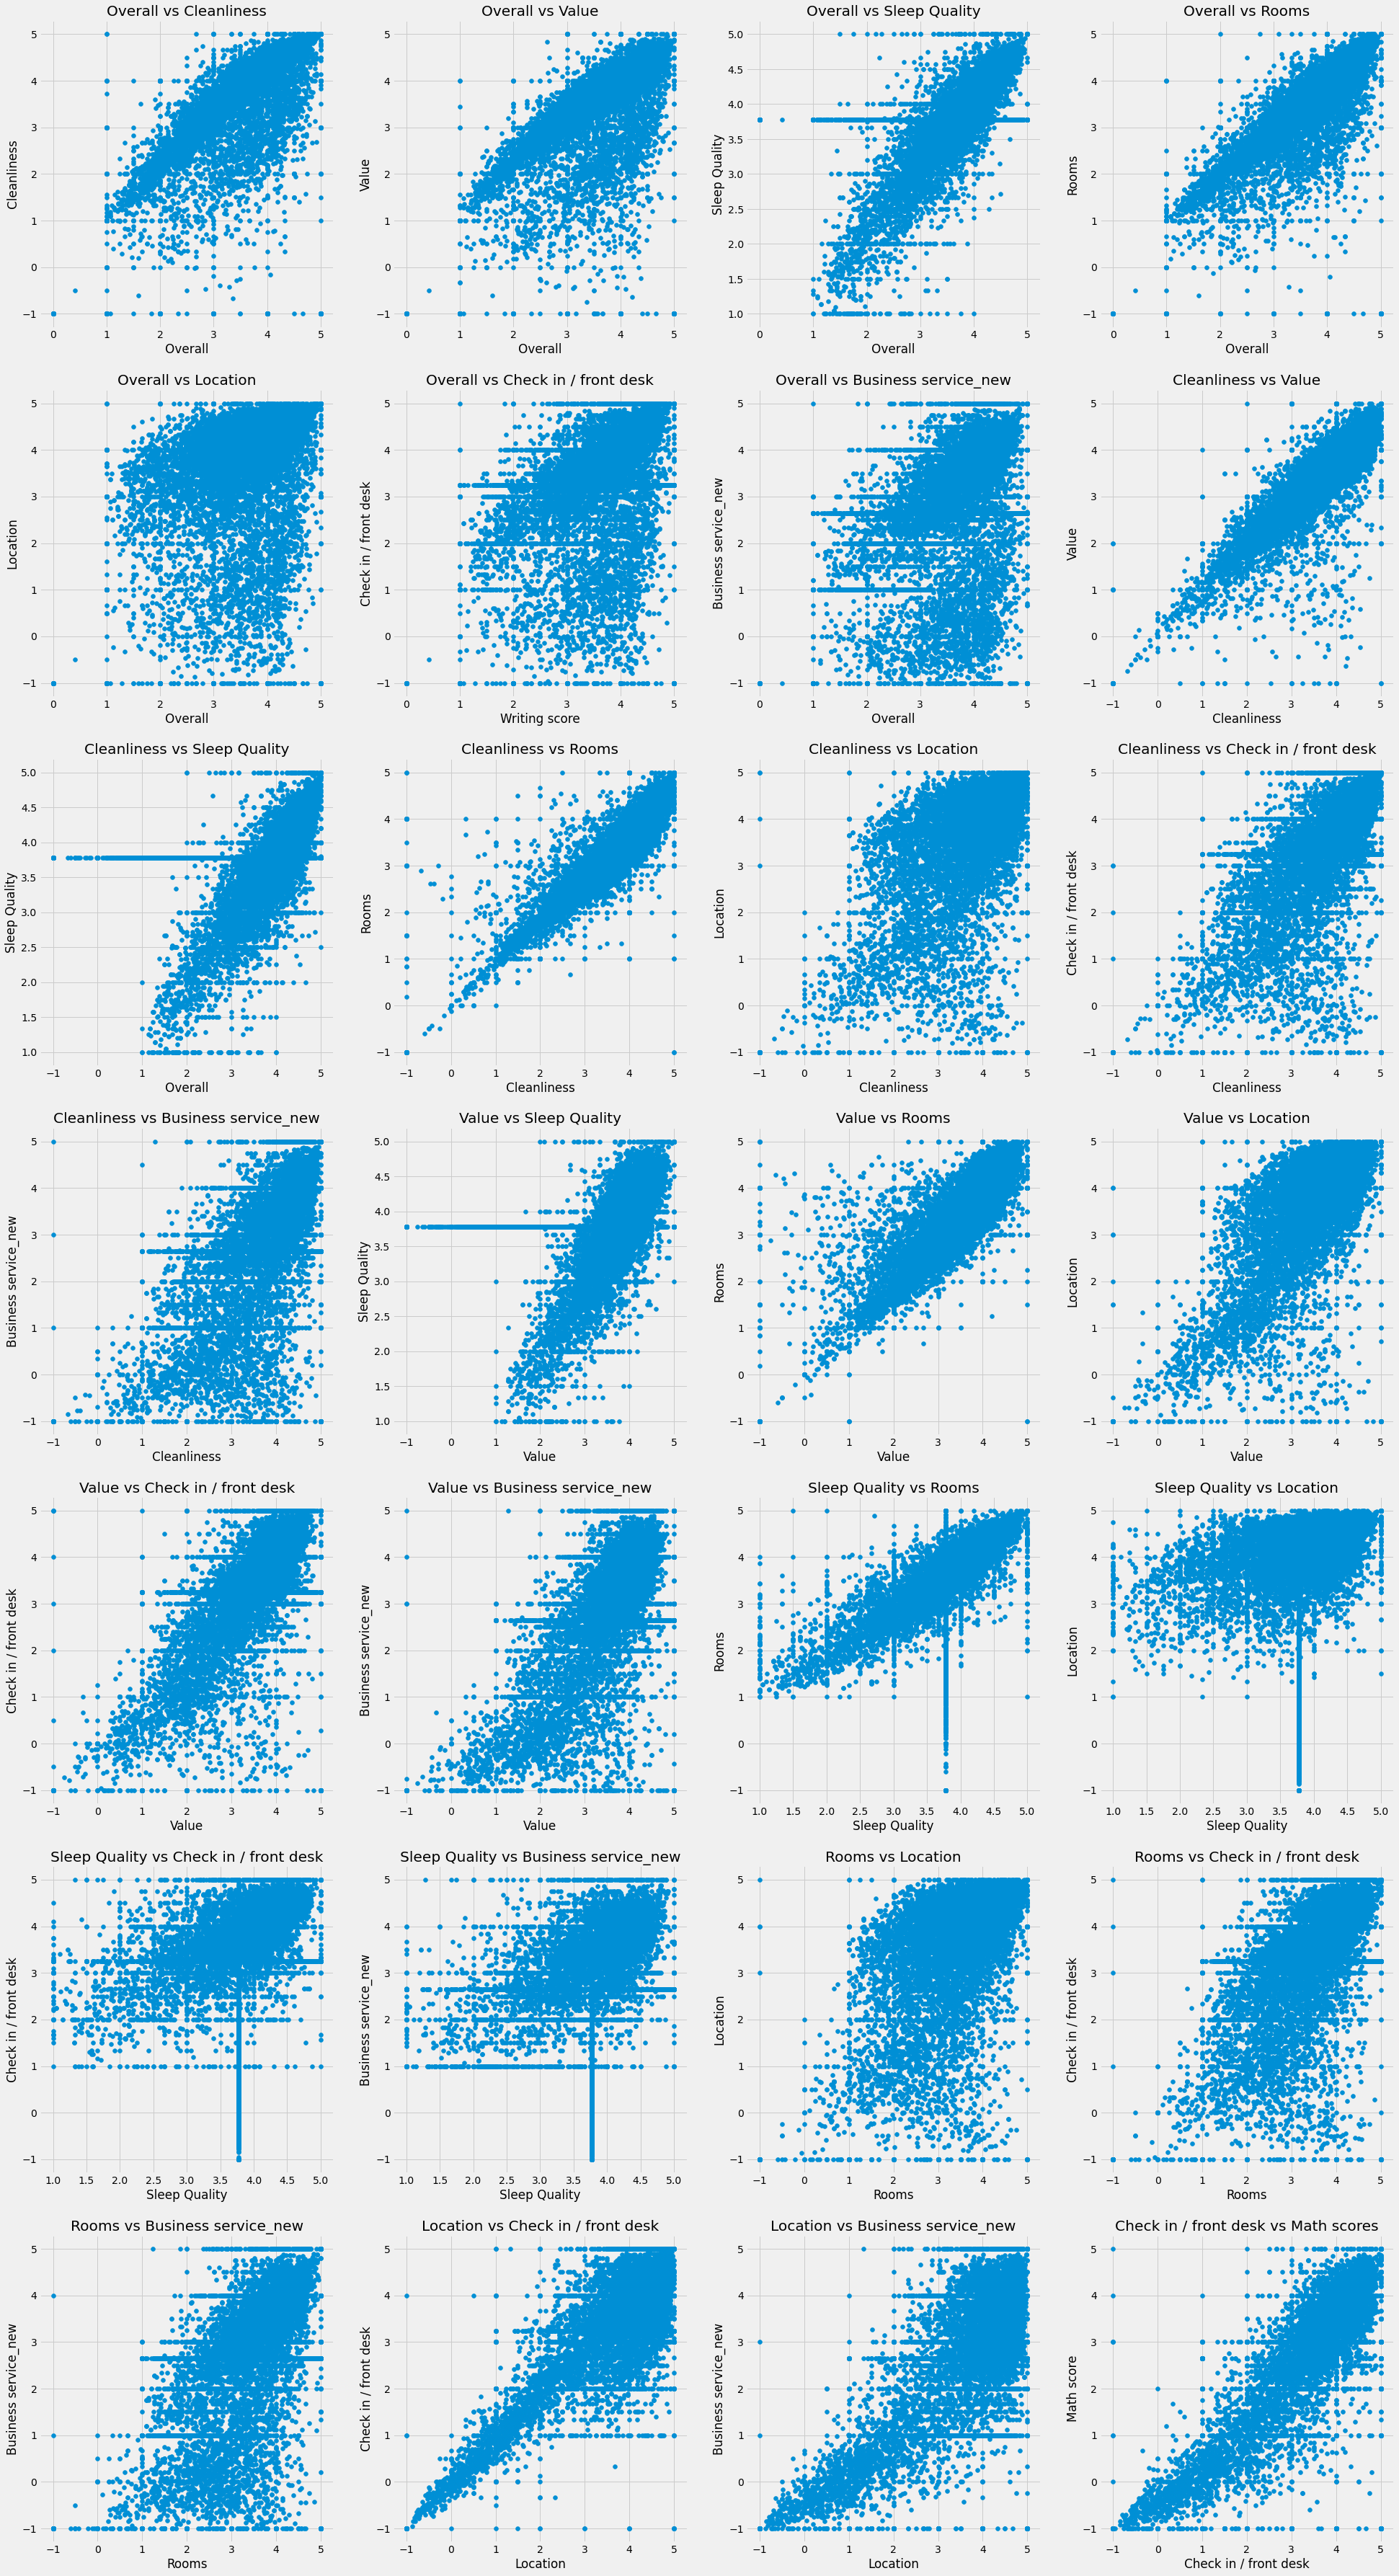

In [21]:
plt.figure(figsize = (30,60))
plt.subplot(7,4,1)
plt.scatter(df_new['Overall'],df_new['Cleanliness'])
plt.title('Overall vs Cleanliness')
plt.xlabel('Overall')
plt.ylabel('Cleanliness')

plt.subplot(7,4,2)
plt.scatter(df_new['Overall'],df_new['Value'])
plt.title('Overall vs Value')
plt.xlabel('Overall')
plt.ylabel('Value')

plt.subplot(7,4,3)
plt.scatter(df_new['Overall'],df_new['Sleep Quality'])
plt.title('Overall vs Sleep Quality')
plt.xlabel('Overall')
plt.ylabel('Sleep Quality')

plt.subplot(7,4,4)
plt.scatter(df['Overall'],df['Rooms'])
plt.title('Overall vs Rooms')
plt.xlabel('Overall')
plt.ylabel('Rooms')

plt.subplot(7,4,5)
plt.scatter(df_new['Overall'],df_new['Location'])
plt.title('Overall vs Location')
plt.xlabel('Overall')
plt.ylabel('Location')

plt.subplot(7,4,6)
plt.scatter(df_new['Overall'],df_new['Check in / front desk'])
plt.title('Overall vs Check in / front desk')
plt.xlabel('Writing score')
plt.ylabel('Check in / front desk')

plt.subplot(7,4,7)
plt.scatter(df_new['Overall'],df_new['Business service_new'])
plt.title('Overall vs Business service_new')
plt.xlabel('Overall')
plt.ylabel('Business service_new')

plt.subplot(7,4,8)
plt.scatter(df_new['Cleanliness'],df_new['Value'])
plt.title('Cleanliness vs Value')
plt.xlabel('Cleanliness')
plt.ylabel('Value')

plt.subplot(7,4,9)
plt.scatter(df_new['Cleanliness'],df_new['Sleep Quality'])
plt.title('Cleanliness vs Sleep Quality')
plt.xlabel('Overall')
plt.ylabel('Sleep Quality')

plt.subplot(7,4,10)
plt.scatter(df_new['Cleanliness'],df_new['Rooms'])
plt.title('Cleanliness vs Rooms')
plt.xlabel('Cleanliness')
plt.ylabel('Rooms')

plt.subplot(7,4,11)
plt.scatter(df_new['Cleanliness'],df_new['Location'])
plt.title('Cleanliness vs Location')
plt.xlabel('Cleanliness')
plt.ylabel('Location')

plt.subplot(7,4,12)
plt.scatter(df_new['Cleanliness'],df_new['Check in / front desk'])
plt.title('Cleanliness vs Check in / front desk')
plt.xlabel('Cleanliness')
plt.ylabel('Check in / front desk')

plt.subplot(7,4,13)
plt.scatter(df_new['Cleanliness'],df_new['Business service_new'])
plt.title('Cleanliness vs Business service_new')
plt.xlabel('Cleanliness')
plt.ylabel('Business service_new')

plt.subplot(7,4,14)
plt.scatter(df_new['Value'],df_new['Sleep Quality'])
plt.title('Value vs Sleep Quality')
plt.xlabel('Value')
plt.ylabel('Sleep Quality')

plt.subplot(7,4,15)
plt.scatter(df_new['Value'],df_new['Rooms'])
plt.title('Value vs Rooms')
plt.xlabel('Value')
plt.ylabel('Rooms')

plt.subplot(7,4,16)
plt.scatter(df_new['Value'],df_new['Location'])
plt.title('Value vs Location')
plt.xlabel('Value')
plt.ylabel('Location')

plt.subplot(7,4,17)
plt.scatter(df_new['Value'],df_new['Check in / front desk'])
plt.title('Value vs Check in / front desk')
plt.xlabel('Value')
plt.ylabel('Check in / front desk')

plt.subplot(7,4,18)
plt.scatter(df_new['Value'],df_new['Business service_new'])
plt.title('Value vs Business service_new')
plt.xlabel('Value')
plt.ylabel('Business service_new')

plt.subplot(7,4,19)
plt.scatter(df_new['Sleep Quality'],df_new['Rooms'])
plt.title('Sleep Quality vs Rooms')
plt.xlabel('Sleep Quality')
plt.ylabel('Rooms')

plt.subplot(7,4,20)
plt.scatter(df_new['Sleep Quality'],df_new['Location'])
plt.title('Sleep Quality vs Location')
plt.xlabel('Sleep Quality')
plt.ylabel('Location')

plt.subplot(7,4,21)
plt.scatter(df_new['Sleep Quality'],df_new['Check in / front desk'])
plt.title('Sleep Quality vs Check in / front desk')
plt.xlabel('Sleep Quality')
plt.ylabel('Check in / front desk')

plt.subplot(7,4,22)
plt.scatter(df_new['Sleep Quality'],df_new['Business service_new'])
plt.title('Sleep Quality vs Business service_new')
plt.xlabel('Sleep Quality')
plt.ylabel('Business service_new')

plt.subplot(7,4,23)
plt.scatter(df_new['Rooms'],df_new['Location'])
plt.title('Rooms vs Location')
plt.xlabel('Rooms')
plt.ylabel('Location')

plt.subplot(7,4,24)
plt.scatter(df_new['Rooms'],df_new['Check in / front desk'])
plt.title('Rooms vs Check in / front desk')
plt.xlabel('Rooms')
plt.ylabel('Check in / front desk')

plt.subplot(7,4,25)
plt.scatter(df_new['Rooms'],df_new['Business service_new'])
plt.title('Rooms vs Business service_new')
plt.xlabel('Rooms')
plt.ylabel('Business service_new')

plt.subplot(7,4,26)
plt.scatter(df_new['Location'],df_new['Check in / front desk'])
plt.title('Location vs Check in / front desk')
plt.xlabel('Location')
plt.ylabel('Check in / front desk')

plt.subplot(7,4,27)
plt.scatter(df_new['Location'],df_new['Business service_new'])
plt.title('Location vs Business service_new')
plt.xlabel('Location')
plt.ylabel('Business service_new')

plt.subplot(7,4,28)
plt.scatter(df_new['Check in / front desk'],df_new['Business service_new'])
plt.title('Check in / front desk vs Math scores')
plt.xlabel('Check in / front desk')
plt.ylabel('Math score')

plt.show()

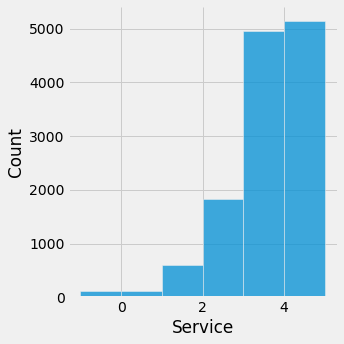

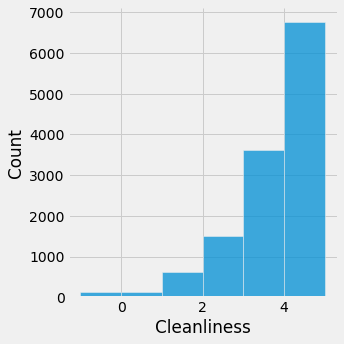

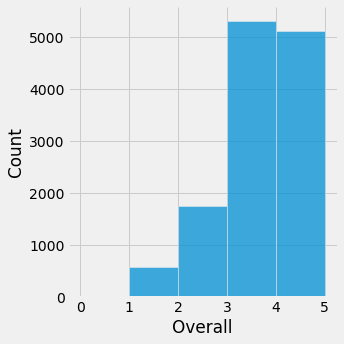

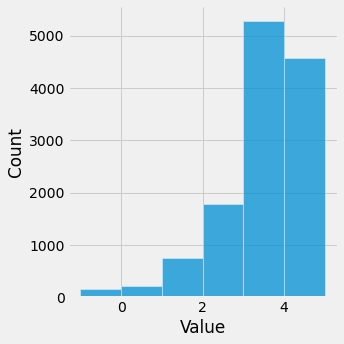

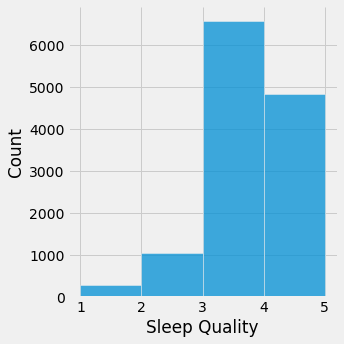

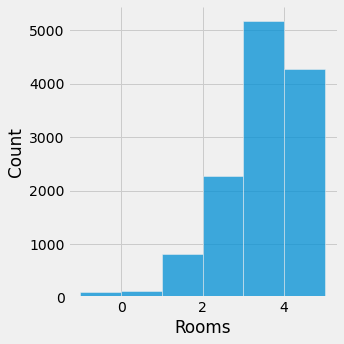

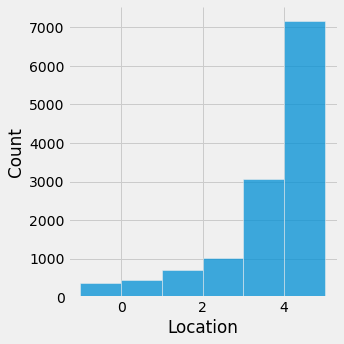

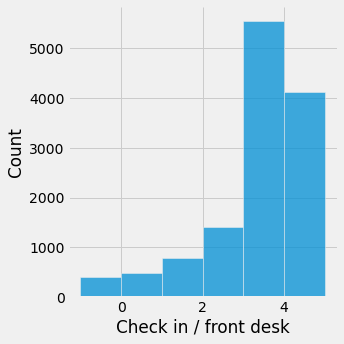

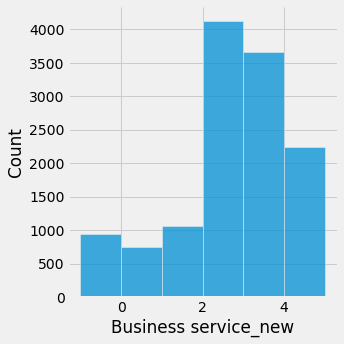

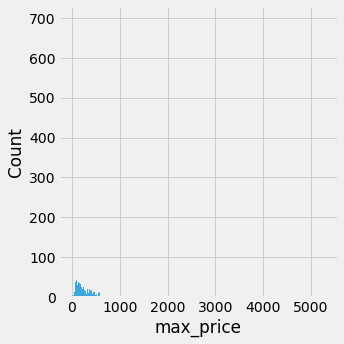

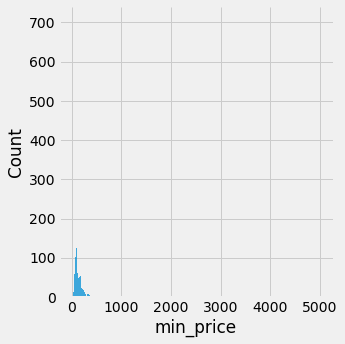

In [22]:
num_col_list = ['Service', 'Cleanliness', 'Overall', 'Value', 'Sleep Quality', 'Rooms',
       'Location', 'Check in / front desk','Business service_new', 'max_price', 'min_price']
for col in num_col_list:
    sns.displot(df_new, x=col, binwidth=1)

Dropping all values of Name that are NAN as I don't want to recommend NAN value to user as hotel name.

In [23]:
df_new.dropna(subset=["Name"], axis=0,inplace=True)
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10008 entries, 0 to 12772
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Service                10008 non-null  float64
 1   Cleanliness            10008 non-null  float64
 2   Overall                10008 non-null  float64
 3   Value                  10008 non-null  float64
 4   Sleep Quality          10008 non-null  float64
 5   Rooms                  10008 non-null  float64
 6   Location               10008 non-null  float64
 7   Check in / front desk  10008 non-null  float64
 8   Name                   10008 non-null  object 
 9   HotelURL               10008 non-null  object 
 10  Price                  10008 non-null  object 
 11  Address                10008 non-null  object 
 12  HotelID                10008 non-null  object 
 13  ImgURL                 10008 non-null  object 
 14  Business service_new   10008 non-null  float64
 15  mi

In [24]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
train_data = df_new[['Service', 'Cleanliness', 'Overall', 'Value', 'Sleep Quality', 'Rooms',
       'Location', 'Check in / front desk','Business service_new', 'min_price', 'max_price']]
train_data.index = df_new['Name']
neigh = NearestNeighbors(n_neighbors=5, radius=0.4)
neigh.fit(train_data)

NearestNeighbors(radius=0.4)

In [25]:
def get_recommendation(model_obj, name, data_set, num_recommendations):
    return neigh.kneighbors([data_set.loc[name]], num_recommendations + 1, return_distance=False)

In [26]:
def recommender_bot(model_obj, name, dataset, num_recommendations):
    similar_hotels = neigh.kneighbors([dataset.loc[name]], num_recommendations + 1, return_distance=False)
    print(similar_hotels[0])
    for hotel in similar_hotels[0]:
        print(train_data.iloc[hotel])

First one is the name of hotel user gave as input. I have kept that in output for just testing purpose. So, that tester can compare all the rating of input with outputs.
## Main application 

In [27]:
num_recommendations = int(input("Enter number of recommendation you want : "))
hotel_name = input("Enter name of hotel : ") or 'Hilton Garden Inn Baltimore White Marsh'
recommender_bot(neigh, hotel_name, train_data, num_recommendations )

Enter number of recommendation you want : 5
Enter name of hotel : 
[   0 3343 9344 5976 6332  714]
Service                    4.588235
Cleanliness                4.742857
Overall                    4.444444
Value                      4.200000
Sleep Quality              4.388889
Rooms                      4.600000
Location                   4.500000
Check in / front desk      4.000000
Business service_new       4.428571
min_price                135.000000
max_price                193.000000
Name: Hilton Garden Inn Baltimore White Marsh, dtype: float64
Service                    4.735318
Cleanliness                4.448749
Overall                    4.304896
Value                      4.397727
Sleep Quality              4.064122
Rooms                      3.710158
Location                   4.749550
Check in / front desk      4.740876
Business service_new       4.049383
min_price                136.000000
max_price                191.000000
Name: Hotel Nadia, dtype: float64
Service      